In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dhaka rent.csv')
df

,area;rent
0,2000;31500
1,2100;35000
2,2500;41050
3,2250;36100
4,3000;52100
5,1900;32500
6,1500;20000
7,1850;24500
8,2700;48000
9,2100;31000


In [17]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [18]:
df.shape

(60, 2)

In [20]:
df = pd.read_csv('Dhaka rent.csv', sep=';')
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [8]:
df.shape

(60, 2)

In [21]:
x = df['area']
y = df['rent']

In [22]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [23]:
mean_x

np.float64(2289.0)

In [24]:
mean_y

np.float64(37269.166666666664)

In [25]:
dev_x = x - mean_x
dev_y = y - mean_y

In [27]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
print(m)

21.292661473611954


In [28]:
# y = mx + c
c = mean_y - m*mean_x
print(c)

-11469.7354464311


In [29]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [30]:
pred_2000 = m*2000 +c
pred_2000

np.float64(31115.58750079281)

Text(0.5, 1.0, 'Dhaka Hourse Rent')

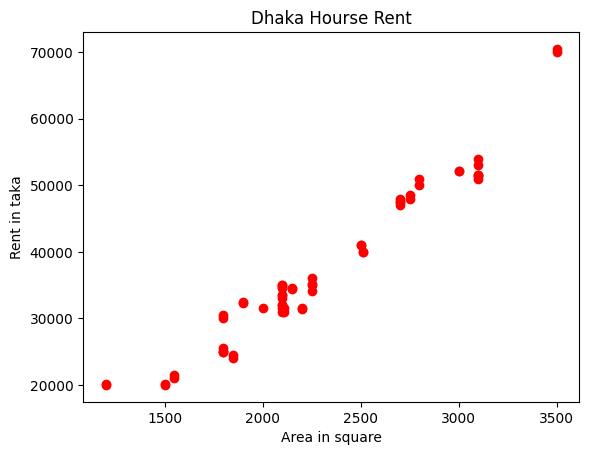

In [33]:
plt.scatter(x, y, color='red')
plt.xlabel("Area in square")
plt.ylabel("Rent in taka")
plt.title('Dhaka Hourse Rent')

In [34]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [35]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [39]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [45]:
x.shape

(60,)

In [46]:
reg.fit(df[['area']], df['rent'])

LinearRegression()

In [47]:
reg.coef_

array([21.29266147])

In [48]:
# olf c, m
print(c, m)

-11469.7354464311 21.292661473611954


In [49]:
reg.intercept_

np.float64(-11469.735446431114)

In [50]:
reg.predict([[2000]])

array([31115.58750079])

In [51]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [54]:
df['predicted'] = reg.predict(df[['area']])
df.head()

,area,rent,predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [56]:
df['residuals'] = df['rent'] - df['predicted']
df.head()

,area,rent,predicted,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
mse = mean_squared_error(df[['predicted']], df[['rent']])
mse

np.float64(6778077.204095561)

In [61]:
mae = mean_absolute_error(df.predicted, df.rent)
mae

np.float64(2009.8695093576282)